In [28]:
import sys
import os
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')

from gptswarm.utils.challenges.PythonChallenge import PythonChallenge

# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Setup

In [10]:
# Load API keys
keys_file = Path("../keys.json")
with open(keys_file) as f:
    keys = json.load(f)
os.environ["OPENAI_API_KEY"] = keys["OPENAI_API_KEY"]

In [11]:
# defining the challenge the swarm will be working on
test_challenge_config = Path('D:/00Repos/GPT-Swarm/gptswarm/utils/challenges/python_challenges/challenge2/pc2_config.yaml')
challenge1 = PythonChallenge(test_challenge_config)
print(challenge1.get_problem())

A password is considered strong if the below conditions are all met:
- It has at least 6 characters and at most 20 characters.
- It contains at least one lowercase letter, at least one uppercase letter, and at least one digit.
- It does not contain three repeating characters in a row (i.e., "Baaabb0" is weak, but "Baaba0" is strong).

Given a string password, return the minimum number of steps required to make password strong. if password is already strong, return 0. Achieve the lowest O-complexity and the lowest memory usage.

In one step, you can:
- Insert one character to password,
- Delete one character from password, or
- Replace one character of password with another character.
 

Example 1:
Input: password = "a"
Output: 5

Example 2:
Input: password = "aA1"
Output: 3

Example 3:
Input: password = "1337C0d3"
Output: 0
 

Constraints:
1 <= password.length <= 50
password consists of letters, digits, dot '.' or exclamation mark '!'.

Include only the following function in your answe

# 2. Solving with vanilla GPT

In [13]:
from gptswarm.utils.GPTAgent import GPTAgent

In [14]:
model_name = "gpt-3.5-turbo"
default_agent_parameters = {
    "model_name": f"openai/{model_name}",
    "model_params" : {
        "model_name": model_name,
        "temperature": 0.5,
        "max_tokens": 1000
        }
    }

agent = GPTAgent(default_agent_parameters)

OpenAI connection successful! Model: gpt-3.5-turbo


In [15]:
conversation = [
    {"role": "system", "content": "Act as a professional python developer with a lot of experience solving leetcode problems in the most efficient (memory and runtime) and elegant way."},
    {"role": "user", "content": challenge1.get_problem()}
]
result = agent.call_model(conversation)
print(result)

To solve this problem, we can follow the below steps:
1. Check if the password meets the length and character requirements. If not, add the necessary characters to make it strong.
2. Check for repeating characters and replace them if necessary.
3. Return the number of steps taken.

To implement this, we can use a combination of regular expressions and string manipulation.

Here's the code:

```python
import re

def strongPasswordChecker(s: str) -> int:
    # Check for length and character requirements
    missing_types = 3
    if re.search('[a-z]', s):
        missing_types -= 1
    if re.search('[A-Z]', s):
        missing_types -= 1
    if re.search('[0-9]', s):
        missing_types -= 1
    if len(s) < 6:
        return max(missing_types, 6 - len(s))
    elif len(s) <= 20:
        return max(missing_types, 0)
    else:
        # Remove excess characters
        delete_count = len(s) - 20
        s = re.sub(r'(\w)\1{2,}', r'\1\1', s)
        repeat_count = len(s) - 20
        # Repl

In [16]:
score, evaluation = challenge1.evaluate_solution(result)
print(score)
print(evaluation)

Weighted score: 0.64, correctness_score: 0.8, runtime_score: 1
0.6400000000000001
Total score: 0.640; 80.00% test cases are solved correctly; 
 Runtime: 0.000ms, which is 1.000 times slower than the ideal solution.
 Some test cases are solved incorrectly. Examples: 
Input: ieRhZc01hCjsFC9h3gIrBFbKUXhhhhhhh5cYvpZU98Fa2fR0ukBQ2slgC
Result: 69
Expected: 37
Correct: False



# 3. Testing the swarm

In [17]:
from gptswarm.swarm.Swarm import Swarm

In [19]:
# establishing the swarm
swarm1 = Swarm(challenge1, (4, 4), {"test": 1})
print(swarm1.agents_coords)
print(swarm1.agents_uuids)

OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
OpenAI connection successful! Model: gpt-3.5-turbo
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [3 0]
 [3 1]
 [3 2]
 [3 3]]
[UUID('5f53479a-608e-42e2-b979-287b5267bb37'), UUID('2040e57d-b336-4213

In [20]:
swarm1.run_swarm(5)

Cycle 0
Shered memory: {'problem': 'A password is considered strong if the below conditions are all met:\n- It has at least 6 characters and at most 20 characters.\n- It contains at least one lowercase letter, at least one uppercase letter, and at least one digit.\n- It does not contain three repeating characters in a row (i.e., "Baaabb0" is weak, but "Baaba0" is strong).\n\nGiven a string password, return the minimum number of steps required to make password strong. if password is already strong, return 0. Achieve the lowest O-complexity and the lowest memory usage.\n\nIn one step, you can:\n- Insert one character to password,\n- Delete one character from password, or\n- Replace one character of password with another character.\n \n\nExample 1:\nInput: password = "a"\nOutput: 5\n\nExample 2:\nInput: password = "aA1"\nOutput: 3\n\nExample 3:\nInput: password = "1337C0d3"\nOutput: 0\n \n\nConstraints:\n1 <= password.length <= 50\npassword consists of letters, digits, dot \'.\' or exclam

In [21]:
print(swarm1.shared_memory['best_answer']['content'])

One possible solution to the problem is as follows:

We can start by checking if the password meets the length requirement. If it does not, we need to add characters to the password to make it longer. The minimum number of characters we need to add is max(0, 6 - len(s)), since the password needs to have at least 6 characters.

Next, we can check if the password contains at least one lowercase letter, one uppercase letter, and one digit. If it does not, we need to add characters to the password to meet these requirements. We can do this by adding one character of each type (lowercase, uppercase, digit) to the password, or by replacing existing characters with characters of the required types. The minimum number of characters we need to add or replace is the number of types that are missing from the password.

Finally, we need to check if the password contains three repeating characters in a row. If it does, we need to remove one or more of these characters to make the password stronger.

In [30]:
step = 1
value_tensor = swarm1.history[step]["value_tensor"]
best_score = swarm1.history[step]["best_score"]

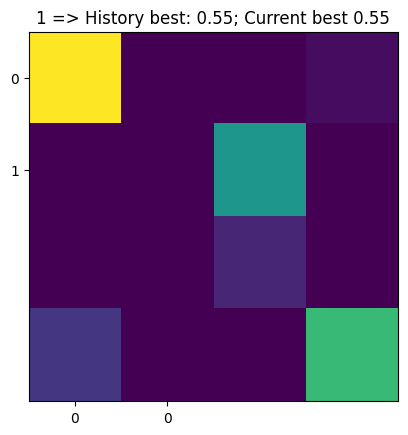

In [32]:
# plot the value tensor
fig, ax = plt.subplots()
im = ax.imshow(value_tensor)
ax.set_xticks(np.arange(len(swarm1.agents_coords[0])))
ax.set_yticks(np.arange(len(swarm1.agents_coords[1])))
ax.set_xticklabels(swarm1.agents_coords[0])
ax.set_yticklabels(swarm1.agents_coords[1])
ax.set_title(f"{step} => History best: {best_score:.2f}; Current best {np.max(value_tensor):.2f}")
plt.show()



In [ ]:
# create a matplotlib animation for the evolution of the swarm value scores

In [22]:
swarm1.history

[{'cycle': 0,
  'cycle_type': 'compute',
  'value_tensor': array([[0.55487297, 0.        , 0.        , 0.01943815],
         [0.        , 0.        , 0.2924823 , 0.        ],
         [0.        , 0.        , 0.06018326, 0.        ],
         [0.08756768, 0.        , 0.        , 0.37484382]]),
  'problem': 'A password is considered strong if the below conditions are all met:\n- It has at least 6 characters and at most 20 characters.\n- It contains at least one lowercase letter, at least one uppercase letter, and at least one digit.\n- It does not contain three repeating characters in a row (i.e., "Baaabb0" is weak, but "Baaba0" is strong).\n\nGiven a string password, return the minimum number of steps required to make password strong. if password is already strong, return 0. Achieve the lowest O-complexity and the lowest memory usage.\n\nIn one step, you can:\n- Insert one character to password,\n- Delete one character from password, or\n- Replace one character of password with another

In [9]:
def test_f(x):
    return x + 1

In [14]:
input = {"x": 1}

In [15]:
test_f(**input)

2